In [1]:
import importlib, TresBolillosSpace as tbs
importlib.reload(tbs)
from TresBolillosSpace import TresBolillosSpace

In [2]:
rows1 = 14
cols1 = 47
space = TresBolillosSpace.from_rect(rows=rows1, cols=cols1, seed=42)
space.sample_initial(seed=43)

N, edges, species = space.to_pulp()
print("N nodos:", len(N), " | aristas (vecinos):", len(edges))
print("Especies:", species)
print("Presembrados totales:", int(space.y_init.sum()))
print("Conteo por especie:", space.counts)

PROPORTIONS = {
    "Agave lechuguilla": 0.0632610632610633, "Agave salmiana": 0.295133437990581, "Agave scabra": 0.0620306334592049, "Agave striata": 0.0595697738554881,
    "Opuntia cantabrigiensis": 0.0777292205863635, "Opuntia engelmannii": 0.0619033476176333, "Opuntia robusta": 0.116508973651831,
    "Opuntia streptacantha": 0.0971190971190971, "Prosopis laevigata": 0.128049556620985, "Yucca filifera": 0.038694895837753,
}
planCount = rows1*cols1
TARGETS = {
    "Agave lechuguilla": round(0.0632610632610633 * planCount), "Agave salmiana": round(0.295133437990581 * planCount), "Agave scabra": round(0.0620306334592049 * planCount), "Agave striata": round(0.0595697738554881 * planCount),
    "Opuntia cantabrigiensis": round(0.0777292205863635 * planCount), "Opuntia engelmannii": round(0.0619033476176333 * planCount), "Opuntia robusta": round(0.116508973651831 * planCount),
    "Opuntia streptacantha": round(0.0971190971190971 * planCount), "Prosopis laevigata": round(0.128049556620985 * planCount), "Yucca filifera": round(0.038694895837753 * planCount),
}

bands_rem, checks = space.remaining_bands(TARGETS, tol=0.05)
print("\nBandas remanentes por especie (nuevas siembras):")
for name, info in bands_rem.items():
    print(" - {:25s} pre={:3d} | L_rem={:3d} | U_rem={:3d}".format(
        name, info["pre"], info["L_rem"], info["U_rem"]
    ))

print("\nChequeos globales:")
for k, v in checks.items():
    print(" ", k, "=", v)

N nodos: 658  | aristas (vecinos): 1853
Especies: ['Agave lechuguilla', 'Agave salmiana', 'Agave scabra', 'Agave striata', 'Opuntia cantabrigiensis', 'Opuntia engelmannii', 'Opuntia robusta', 'Opuntia streptacantha', 'Prosopis laevigata', 'Yucca filifera']
Presembrados totales: 123
Conteo por especie: {'Agave lechuguilla': 6, 'Agave salmiana': 34, 'Agave scabra': 14, 'Agave striata': 8, 'Opuntia cantabrigiensis': 6, 'Opuntia engelmannii': 6, 'Opuntia robusta': 16, 'Opuntia streptacantha': 13, 'Prosopis laevigata': 15, 'Yucca filifera': 5}

Bandas remanentes por especie (nuevas siembras):
 - Agave lechuguilla         pre=  6 | L_rem= 33 | U_rem= 39
 - Agave salmiana            pre= 34 | L_rem=150 | U_rem=170
 - Agave scabra              pre= 14 | L_rem= 24 | U_rem= 30
 - Agave striata             pre=  8 | L_rem= 29 | U_rem= 33
 - Opuntia cantabrigiensis   pre=  6 | L_rem= 42 | U_rem= 48
 - Opuntia engelmannii       pre=  6 | L_rem= 32 | U_rem= 38
 - Opuntia robusta           pre= 16 | 

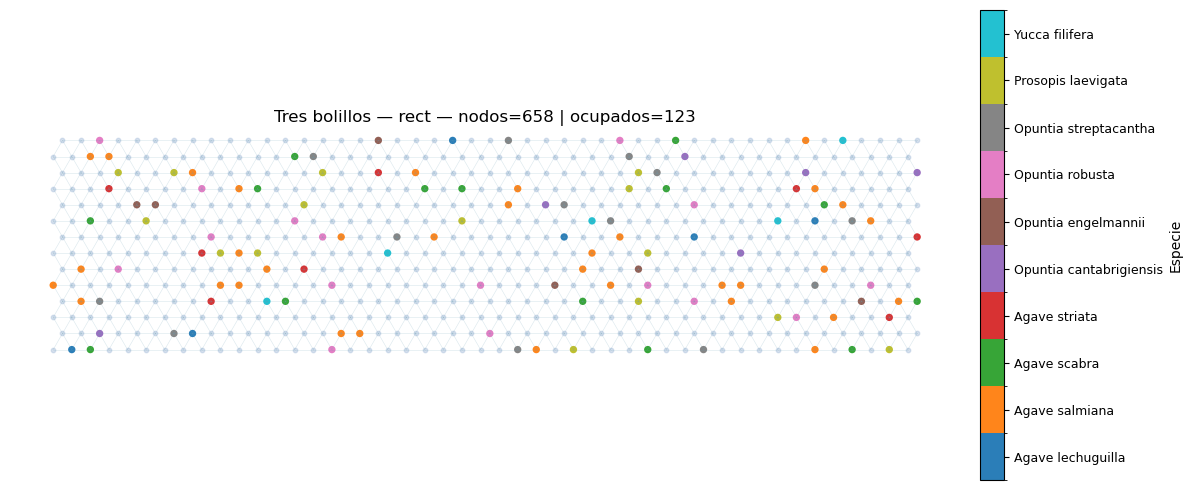

In [3]:

space.plot(spacing=1.0, show_edges=True)

In [4]:
space.get_matrix_view("species_index")

array([[-1, -1,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1,  5, -1, -1, -1,  0, -1, -1,  7, -1, -1, -1, -1, -1,  6, -1,
        -1,  2, -1, -1, -1, -1, -1, -1,  1, -1,  9, -1, -1, -1, -1],
       [-1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,  7, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  7,
        -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1,  8, -1, -1,  8,  1, -1, -1, -1, -1, -1, -1,  8, -1,
        -1,  3, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  8,
         7, -1, -1, -1, -1, -1, -1, -1,  4, -1, -1, -1, -1, -1,  4],
       [-1, -1, -1,  3, -1, -1, -1, -1,  6, -1,  1,  2, -1, -1, -1, -1,
        -1, -1, -1, -1,  2, -1,  2, -1, -1,  1, -1, -1, -1, -1, -1,  8,
        -1,  2, -1, -1, -1, -1, -1, -1,  3,  1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1,  5,  5, -1, -1, -1, -1, -1, -1, -1,  8, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  4,  7, -1, -1, -1, -1,
    

## Matrix View
Get the nodes arranged in matrix form matching the plot layout (bottom-up)

In [5]:
# Get matrix view with species names (bottom-up orientation)
matrix_names = space.get_matrix_view("species_index")

# Show a small section of the matrix
print(f"\n--- First 3 rows (bottom of plot), first 10 columns ---")
print(matrix_names[:3, :])
matrix_names[0, :].shape


--- First 3 rows (bottom of plot), first 10 columns ---
[[-1 -1  6 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5 -1 -1 -1  0 -1 -1
   7 -1 -1 -1 -1 -1  6 -1 -1  2 -1 -1 -1 -1 -1 -1  1 -1  9 -1 -1 -1 -1]
 [-1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  7 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1  7 -1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1  8 -1 -1  8  1 -1 -1 -1 -1 -1 -1  8 -1 -1  3 -1  1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1  8  7 -1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1 -1 -1  4]]


(47,)

In [6]:
from optimizador import fitnessCompetencia
from optimizador import fitnessDiversidad
from optimizador import fitnessCompetenciaSupervivencia

# Matriz de competencia entre plantas 10x10 
import numpy as np
seed = 42
np.random.seed(seed)
competencia = np.array([
    [1, 0.8, 0.8, 0.8, 0.3, 0.3, 0.3, 0.3, 0.5, 0.2],
    [0.8, 1, 0.8, 0.8, 0.3, 0.3, 0.3, 0.3, 0.5, 0.2],
    [0.8, 0.8, 1, 0.8, 0.3, 0.3, 0.3, 0.3, 0.5, 0.2],
    [0.8, 0.8, 0.8, 1, 0.3, 0.3, 0.3, 0.3, 0.5, 0.2],
    [0.3, 0.3, 0.3, 0.3, 1, 0.8, 0.8, 1, 0.8, 0.2],
    [0.3, 0.3, 0.3, 0.3, 0.8, 1, 0.8, 0.8, 0.5, 0.2],
    [0.3, 0.3, 0.3, 0.3, 0.8, 0.8, 1, 0.8, 0.5, 0.2],
    [0.3, 0.3, 0.3, 0.3, 0.8, 0.8, 0.8, 1, 0.5, 0.2],
    [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 0.3],
    [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1]
])
print("Matriz de competencia:\n", competencia)

plantas = matrix_names

# Calcular la competencia total
competencia_total = fitnessCompetencia(plantas, competencia)
print("Competencia total:", competencia_total)
# Calcular la diversidad total
diversidad_total = fitnessDiversidad(plantas, num_especies=10)
print("Diversidad total:", diversidad_total)

Matriz de competencia:
 [[1.  0.8 0.8 0.8 0.3 0.3 0.3 0.3 0.5 0.2]
 [0.8 1.  0.8 0.8 0.3 0.3 0.3 0.3 0.5 0.2]
 [0.8 0.8 1.  0.8 0.3 0.3 0.3 0.3 0.5 0.2]
 [0.8 0.8 0.8 1.  0.3 0.3 0.3 0.3 0.5 0.2]
 [0.3 0.3 0.3 0.3 1.  0.8 0.8 1.  0.8 0.2]
 [0.3 0.3 0.3 0.3 0.8 1.  0.8 0.8 0.5 0.2]
 [0.3 0.3 0.3 0.3 0.8 0.8 1.  0.8 0.5 0.2]
 [0.3 0.3 0.3 0.3 0.8 0.8 0.8 1.  0.5 0.2]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 1.  0.3]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 1. ]]
Competencia total: 72.19999999999993
Diversidad total: 0.4959349593495934


In [7]:
# Install pymoo if not already installed
try:
    import pymoo
    print(f"pymoo version: {pymoo.__version__}")
except ImportError:
    print("Installing pymoo...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'pymoo'])
    import pymoo
    print(f"pymoo installed successfully! Version: {pymoo.__version__}")

pymoo version: 0.6.1.5


In [8]:
supervivencia = np.array([0.3675, 0.0459, 0.12735, 0.0431, 0.08565, 0.0903, 0.0401, 0.07375, 0.09105, 0.13685])

In [9]:
from optimizador import PlantDistributionProblem

# Configurar el problema CON RESTRICCIONES SUAVES (más soluciones en el frente de Pareto)
problem = PlantDistributionProblem(
    space=space,
    competencia_matrix=competencia,
    targets=TARGETS,
    tol=0.2,
    enforce_constraints=False,  # False = restricciones suaves, True = restricciones duras
    vectorSupervivencia= supervivencia
)

print(f"\n{'='*60}")
print("CONFIGURACIÓN DEL PROBLEMA")
print(f"{'='*60}")
print(f"Variables a optimizar: {problem.n_variables} nodos vacíos")
print(f"Objetivos: {problem.n_obj} (competencia, diversidad)")
print(f"Restricciones: {problem.n_constr} (bandas por especie)")
print(f"\nBandas remanentes por especie:")
for name, band in problem.bands_rem.items():
    print(f"  {name:25s}: [{band['L_rem']:3d}, {band['U_rem']:3d}] + {band['pre']:3d} pre-sembrados")
print(f"{'='*60}")

Problema configurado:
  - Nodos totales: 658
  - Nodos fijos (pre-sembrados): 123
  - Nodos a optimizar (vacíos): 535
  - Especies: 10
  - Tolerancia de bandas: ±20%
  - Restricciones: SUAVES (penalizadas)

CONFIGURACIÓN DEL PROBLEMA
Variables a optimizar: 535 nodos vacíos
Objetivos: 2 (competencia, diversidad)
Restricciones: 0 (bandas por especie)

Bandas remanentes por especie:
  Agave lechuguilla        : [ 27,  45] +   6 pre-sembrados
  Agave salmiana           : [121, 199] +  34 pre-sembrados
  Agave scabra             : [ 18,  36] +  14 pre-sembrados
  Agave striata            : [ 23,  39] +   8 pre-sembrados
  Opuntia cantabrigiensis  : [ 34,  56] +   6 pre-sembrados
  Opuntia engelmannii      : [ 26,  44] +   6 pre-sembrados
  Opuntia robusta          : [ 45,  77] +  16 pre-sembrados
  Opuntia streptacantha    : [ 38,  64] +  13 pre-sembrados
  Prosopis laevigata       : [ 52,  86] +  15 pre-sembrados
  Yucca filifera           : [ 15,  25] +   5 pre-sembrados


In [10]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.algorithms.moo.sms import SMSEMOA
from pymoo.operators.crossover.pntx import TwoPointCrossover
from pymoo.operators.mutation.pm import PolynomialMutation
from pymoo.operators.sampling.rnd import IntegerRandomSampling
from pymoo.operators.selection.tournament import TournamentSelection
from pymoo.optimize import minimize
from pymoo.termination import get_termination
import matplotlib.pyplot as plt

from optimizador import MidRowCrossover, SpeciesMutation, SmartInitialSampling, tournament_compare
# algorithm_ = SMSEMOA(
#     pop_size=300,  # Tamaño de población
#     sampling=SmartInitialSampling(),  # Muestreo inicial inteligente
#     crossover=MidRowCrossover(),  # Cruza en mitad de filas
#     mutation=SpeciesMutation(prob=0.1),  # Mutación con prob 10%
#     selection=TournamentSelection(func_comp=tournament_compare),  # Selección por torneo
#     eliminate_duplicates=True
# )
algorithm_ = NSGA2(
    pop_size=300,  # Tamaño de población
    sampling=SmartInitialSampling(),  # Muestreo inicial inteligente
    crossover=MidRowCrossover(),  # Cruza en mitad de filas
    mutation=SpeciesMutation(prob=0.1),  # Mutación con prob 10%
    selection=TournamentSelection(func_comp=tournament_compare),  # Selección por torneo
    eliminate_duplicates=True
)

# Criterio de terminación
generaciones = 300
termination = get_termination("n_gen", generaciones)  # 100 generaciones

print("✓ Algoritmo NSGA-II configurado")
print(f"  - Población: {algorithm_.pop_size}")
print(f"  - Generaciones: {generaciones}")
print(f"  - Operadores: MidRowCrossover + SpeciesMutation (10%)")
print(f"  - Selección: Torneo (rank-based)")

✓ Algoritmo NSGA-II configurado
  - Población: 300
  - Generaciones: 300
  - Operadores: MidRowCrossover + SpeciesMutation (10%)
  - Selección: Torneo (rank-based)


In [11]:
# Ejecutar la optimización
print("Iniciando optimización NSGA-II...")
print("Esto puede tomar varios minutos...\n")

res = minimize(
    problem,
    algorithm_,
    termination,
    seed=42,
    verbose=True
)

print("\n" + "="*60)
print("OPTIMIZACIÓN COMPLETADA")
print("="*60)
print(f"Soluciones en el frente de Pareto: {len(res.F)}")
print(f"Tiempo de ejecución: {res.exec_time:.2f} segundos")

Iniciando optimización NSGA-II...
Esto puede tomar varios minutos...

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      300 |      5 |             - |             -
     2 |      600 |      6 |  0.2450000000 |         ideal
     3 |      900 |      6 |  0.0241102181 |         ideal
     4 |     1200 |      9 |  0.1727094903 |         ideal
     5 |     1500 |      9 |  0.1363757818 |         ideal
     6 |     1800 |     10 |  0.0152108600 |             f
     7 |     2100 |      8 |  0.0833333333 |         ideal
     8 |     2400 |     12 |  0.0647499820 |         ideal
     9 |     2700 |     16 |  0.0231923548 |             f
    10 |     3000 |     11 |  0.0719424460 |         ideal
    11 |     3300 |     11 |  0.2777669633 |         ideal
    12 |     3600 |     12 |  0.4569441208 |         nadir
    13 |     3900 |      9 |  0.0437688784 |         ideal
    14 |     4200 |      6 |  0.0802365885 |             f
    15 |     4500 |      7 |  0.0303030303 | 

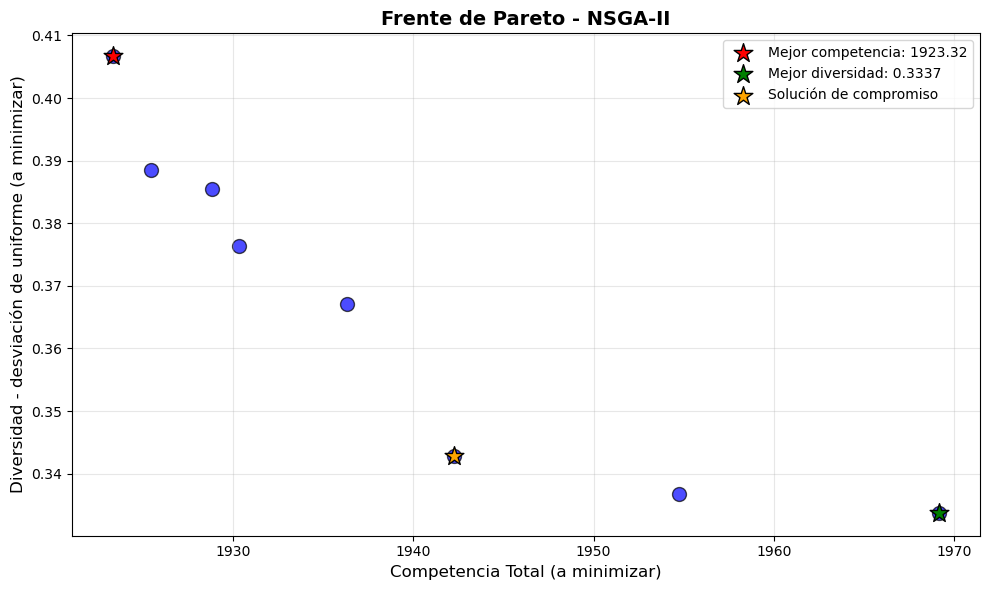


Estadísticas del frente de Pareto (competencia desnormalizada):
  Competencia: min=1923.32, max=1969.16, mean=1938.79
  Diversidad:  min=0.3337, max=0.4067, mean=0.3672


In [12]:
# Visualizar el frente de Pareto con competencia desnormalizada
fig, ax = plt.subplots(figsize=(10, 6))

# Desnormalizar la competencia para el plot
# res.F[:, 0] contiene competencia normalizada, necesitamos multiplicar por n_occupied
F_denormalized = res.F.copy()

# Para cada solución, calcular el número de nodos ocupados y desnormalizar
for i in range(len(res.F)):
    full_solution = np.full(problem.n_nodes, -1, dtype=int)
    full_solution[problem.fixed_nodes] = problem.fixed_species
    full_solution[problem.empty_nodes] = res.X[i]
    n_occupied = (full_solution >= 0).sum()
    F_denormalized[i, 0] = res.F[i, 0] * n_occupied  # Desnormalizar

# Graficar todas las soluciones del frente de Pareto con competencia desnormalizada
ax.scatter(F_denormalized[:, 0], F_denormalized[:, 1], s=100, alpha=0.7, c='blue', edgecolors='black')

# Marcar algunas soluciones destacadas
if len(res.F) > 0:
    # Mejor en competencia
    best_comp_idx = np.argmin(res.F[:, 0])
    ax.scatter(F_denormalized[best_comp_idx, 0], F_denormalized[best_comp_idx, 1], 
              s=200, c='red', marker='*', edgecolors='black', 
              label=f'Mejor competencia: {F_denormalized[best_comp_idx, 0]:.2f}', zorder=5)
    
    # Mejor en diversidad
    best_div_idx = np.argmin(res.F[:, 1])
    ax.scatter(F_denormalized[best_div_idx, 0], F_denormalized[best_div_idx, 1], 
              s=200, c='green', marker='*', edgecolors='black',
              label=f'Mejor diversidad: {F_denormalized[best_div_idx, 1]:.4f}', zorder=5)
    
    # Solución de compromiso (más cercana al origen normalizado)
    normalized_F = (res.F - res.F.min(axis=0)) / (res.F.max(axis=0) - res.F.min(axis=0) + 1e-10)
    distances = np.sqrt(normalized_F[:, 0]**2 + normalized_F[:, 1]**2)
    compromise_idx = np.argmin(distances)
    ax.scatter(F_denormalized[compromise_idx, 0], F_denormalized[compromise_idx, 1], 
              s=200, c='orange', marker='*', edgecolors='black',
              label='Solución de compromiso', zorder=5)

ax.set_xlabel('Competencia Total (a minimizar)', fontsize=12)
ax.set_ylabel('Diversidad - desviación de uniforme (a minimizar)', fontsize=12)
ax.set_title('Frente de Pareto - NSGA-II', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nEstadísticas del frente de Pareto (competencia desnormalizada):")
print(f"  Competencia: min={F_denormalized[:, 0].min():.2f}, max={F_denormalized[:, 0].max():.2f}, mean={F_denormalized[:, 0].mean():.2f}")
print(f"  Diversidad:  min={F_denormalized[:, 1].min():.4f}, max={F_denormalized[:, 1].max():.4f}, mean={F_denormalized[:, 1].mean():.4f}")

In [13]:
# Función auxiliar para reconstruir y visualizar una solución
def visualize_solution(solution_vector, problem, title="Distribución de Plantas"):
    """
    Visualiza una solución del frente de Pareto.
    """
    # Reconstruir la solución completa
    full_solution = np.full(problem.n_nodes, -1, dtype=int)
    full_solution[problem.fixed_nodes] = problem.fixed_species
    full_solution[problem.empty_nodes] = solution_vector
    
    # Crear una copia temporal del space para visualizar
    temp_space = TresBolillosSpace.from_rect(rows=problem.rows, cols=problem.cols, seed=42)
    temp_space.y_init = (full_solution >= 0).astype(int)
    temp_space.species_init = full_solution
    temp_space.counts = {temp_space.species[i]: int((full_solution == i).sum()) 
                         for i in range(len(temp_space.species))}
    
    # Visualizar
    temp_space.plot(spacing=1.0, show_edges=True)
    
    # Mostrar estadísticas
    print(f"\n{title}")
    print("="*60)
    matrix = full_solution.reshape(problem.rows, problem.cols)
    matrix = np.flipud(matrix)
    
    # Calcular competencia TOTAL (sin normalizar) para mostrar
    comp_total = fitnessCompetencia(matrix, problem.competencia_matrix)
    div = fitnessDiversidad(matrix, problem.n_species)

    comp_supervivencia = fitnessCompetenciaSupervivencia(matrix, problem.competencia_matrix, supervivencia)

    print(f"  Competencia y supervivencia total: {comp_supervivencia:.2f}")
    print(f"  Competencia total: {comp_total:.2f}")
    print(f"  Diversidad: {div:.4f}")
    print(f"\n  Conteo por especie:")
    for name, count in temp_space.counts.items():
        target = problem.targets[name]
        band = problem.bands_rem[name]
        L_total = band['pre'] + band['L_rem']
        U_total = band['pre'] + band['U_rem']
        status = "✓" if L_total <= count <= U_total else "✗"
        print(f"    {status} {name:25s}: {count:3d} (objetivo: {target:3d}, banda: [{L_total:3d}, {U_total:3d}])")
    
    return temp_space

print("✓ Función visualize_solution definida")

✓ Función visualize_solution definida


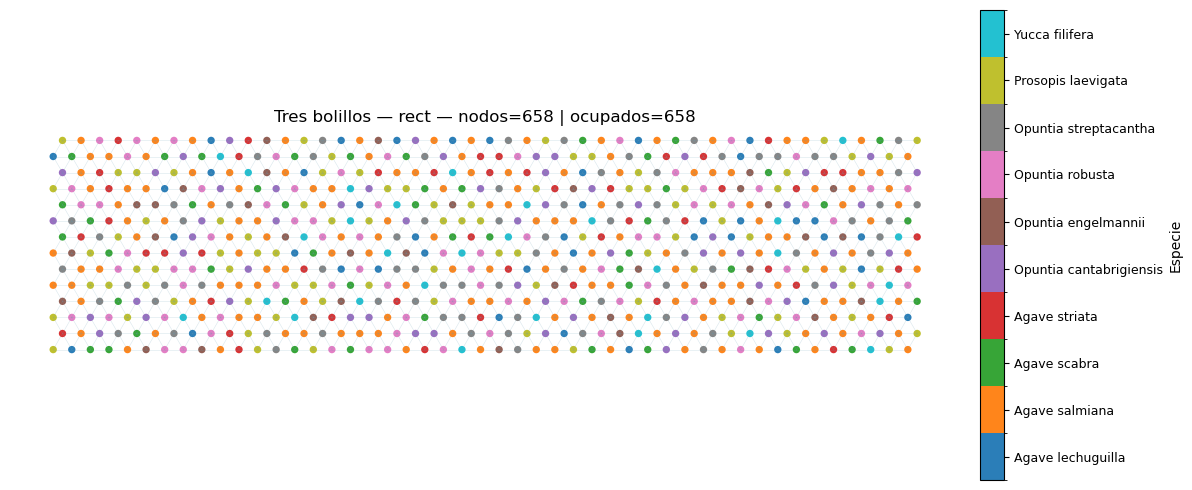


Solución: Mejor Competencia
  Competencia y supervivencia total: 1923.32
  Competencia total: 1907.40
  Diversidad: 0.4067

  Conteo por especie:
    ✓ Agave lechuguilla        :  41 (objetivo:  42, banda: [ 33,  51])
    ✓ Agave salmiana           : 157 (objetivo: 194, banda: [155, 233])
    ✓ Agave scabra             :  49 (objetivo:  41, banda: [ 32,  50])
    ✓ Agave striata            :  47 (objetivo:  39, banda: [ 31,  47])
    ✓ Opuntia cantabrigiensis  :  59 (objetivo:  51, banda: [ 40,  62])
    ✓ Opuntia engelmannii      :  35 (objetivo:  41, banda: [ 32,  50])
    ✓ Opuntia robusta          :  78 (objetivo:  77, banda: [ 61,  93])
    ✓ Opuntia streptacantha    :  75 (objetivo:  64, banda: [ 51,  77])
    ✓ Prosopis laevigata       :  87 (objetivo:  84, banda: [ 67, 101])
    ✓ Yucca filifera           :  30 (objetivo:  25, banda: [ 20,  30])


In [14]:
# Visualizar las tres mejores soluciones
if len(res.F) > 0:
    # 1. Mejor en competencia
    best_comp_idx = np.argmin(res.F[:, 0])
    space_comp = visualize_solution(
        res.X[best_comp_idx], 
        problem, 
        title="Solución: Mejor Competencia"
    )

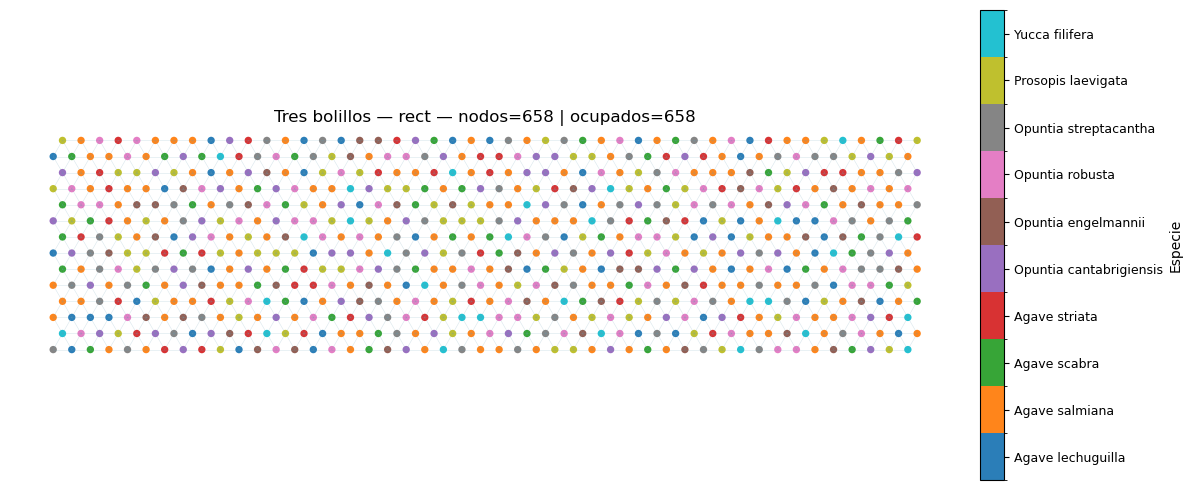


Solución: Mejor Diversidad
  Competencia y supervivencia total: 1969.16
  Competencia total: 1951.10
  Diversidad: 0.3337

  Conteo por especie:
    ✓ Agave lechuguilla        :  51 (objetivo:  42, banda: [ 33,  51])
    ✓ Agave salmiana           : 155 (objetivo: 194, banda: [155, 233])
    ✓ Agave scabra             :  50 (objetivo:  41, banda: [ 32,  50])
    ✓ Agave striata            :  47 (objetivo:  39, banda: [ 31,  47])
    ✓ Opuntia cantabrigiensis  :  62 (objetivo:  51, banda: [ 40,  62])
    ✓ Opuntia engelmannii      :  46 (objetivo:  41, banda: [ 32,  50])
    ✓ Opuntia robusta          :  72 (objetivo:  77, banda: [ 61,  93])
    ✓ Opuntia streptacantha    :  69 (objetivo:  64, banda: [ 51,  77])
    ✓ Prosopis laevigata       :  77 (objetivo:  84, banda: [ 67, 101])
    ✓ Yucca filifera           :  29 (objetivo:  25, banda: [ 20,  30])


In [15]:
# 2. Mejor en diversidad
best_div_idx = np.argmin(res.F[:, 1])
space_div = visualize_solution(
    res.X[best_div_idx], 
    problem, 
    title="Solución: Mejor Diversidad"
)

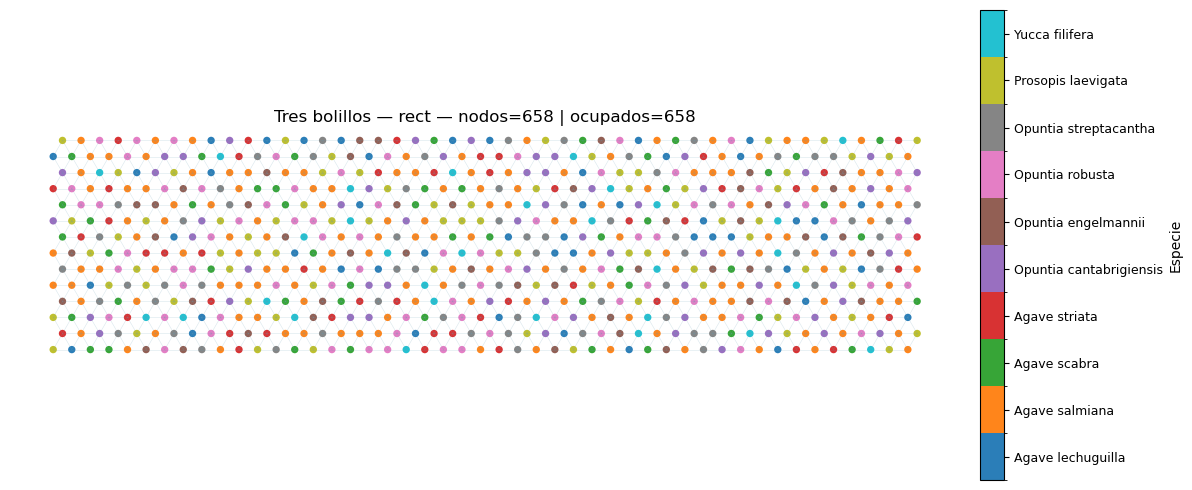


Solución: Compromiso Balanceado
  Competencia y supervivencia total: 1942.25
  Competencia total: 1924.40
  Diversidad: 0.3429

  Conteo por especie:
    ✓ Agave lechuguilla        :  48 (objetivo:  42, banda: [ 33,  51])
    ✓ Agave salmiana           : 156 (objetivo: 194, banda: [155, 233])
    ✓ Agave scabra             :  50 (objetivo:  41, banda: [ 32,  50])
    ✓ Agave striata            :  47 (objetivo:  39, banda: [ 31,  47])
    ✓ Opuntia cantabrigiensis  :  60 (objetivo:  51, banda: [ 40,  62])
    ✓ Opuntia engelmannii      :  47 (objetivo:  41, banda: [ 32,  50])
    ✓ Opuntia robusta          :  77 (objetivo:  77, banda: [ 61,  93])
    ✓ Opuntia streptacantha    :  66 (objetivo:  64, banda: [ 51,  77])
    ✓ Prosopis laevigata       :  77 (objetivo:  84, banda: [ 67, 101])
    ✓ Yucca filifera           :  30 (objetivo:  25, banda: [ 20,  30])


In [16]:
# 3. Solución de compromiso
normalized_F = (res.F - res.F.min(axis=0)) / (res.F.max(axis=0) - res.F.min(axis=0) + 1e-10)
distances = np.sqrt(normalized_F[:, 0]**2 + normalized_F[:, 1]**2)
compromise_idx = np.argmin(distances)
space_compromise = visualize_solution(
    res.X[compromise_idx], 
    problem, 
    title="Solución: Compromiso Balanceado"
)

In [17]:
# Exportar resultados del frente de Pareto con competencia desnormalizada
import pandas as pd

# Desnormalizar la competencia
F_denormalized = res.F.copy()
for i in range(len(res.F)):
    full_solution = np.full(problem.n_nodes, -1, dtype=int)
    full_solution[problem.fixed_nodes] = problem.fixed_species
    full_solution[problem.empty_nodes] = res.X[i]
    n_occupied = (full_solution >= 0).sum()
    F_denormalized[i, 0] = res.F[i, 0] * n_occupied

# Crear DataFrame con todas las soluciones del frente de Pareto
pareto_df = pd.DataFrame({
    'Competencia_Total': F_denormalized[:, 0],
    'Competencia_Normalizada': res.F[:, 0],
    'Diversidad': res.F[:, 1]
})

# Marcar las soluciones destacadas
pareto_df['Tipo'] = 'Normal'
pareto_df.loc[best_comp_idx, 'Tipo'] = 'Mejor_Competencia'
pareto_df.loc[best_div_idx, 'Tipo'] = 'Mejor_Diversidad'
pareto_df.loc[compromise_idx, 'Tipo'] = 'Compromiso'

# Mostrar las soluciones
print("\nFrente de Pareto completo:")
print(pareto_df.sort_values('Competencia_Total'))

# Guardar a CSV (opcional)
# pareto_df.to_csv('pareto_front.csv', index=False)
# print("\n✓ Resultados guardados en 'pareto_front.csv'")

# Resumen estadístico
print("\n" + "="*60)
print("ESTADÍSTICAS FINALES")
print("="*60)
print(f"Total de soluciones en frente de Pareto: {len(res.F)}")
print(f"Rango de competencia total: [{F_denormalized[:, 0].min():.2f}, {F_denormalized[:, 0].max():.2f}]")
print(f"Rango de diversidad: [{res.F[:, 1].min():.4f}, {res.F[:, 1].max():.4f}]")
print(f"Tiempo total de ejecución: {res.exec_time:.2f} segundos")
print(f"Generaciones ejecutadas: {res.algorithm.n_gen}")


Frente de Pareto completo:
   Competencia_Total  Competencia_Normalizada  Diversidad               Tipo
5        1923.320178                 2.922979    0.406687  Mejor_Competencia
3        1925.409441                 2.926154    0.388450             Normal
0        1928.822048                 2.931340    0.385410             Normal
6        1930.289965                 2.933571    0.376292             Normal
7        1936.286459                 2.942685    0.367173             Normal
4        1942.247959                 2.951745    0.342857         Compromiso
2        1954.748263                 2.970742    0.336778             Normal
1        1969.161632                 2.992647    0.333739   Mejor_Diversidad

ESTADÍSTICAS FINALES
Total de soluciones en frente de Pareto: 8
Rango de competencia total: [1923.32, 1969.16]
Rango de diversidad: [0.3337, 0.4067]
Tiempo total de ejecución: 201.52 segundos
Generaciones ejecutadas: 301


In [18]:
plantas = np.array([[6, 1, 6, 8],
                    [1, 9, 7, 3],
                    [8, 5, 9, 7],
                    [5, 1, 8, 1]])

print(fitnessCompetencia(plantas, competencia))

23.200000000000003


In [19]:
datos = np.array([[1, 4, 2, 7, 2, 8, 6, 1, 8, 8, 9, 1, 2, 8, 2, 0, 1, 6, 3, 5, 6, 5, 8, 2, 9, 7, 6, 1, 9, 1, 9, 1, 1, 8, 3, 1, 8, 0, 1, 8, 9, 1, 5, 4, 7, 1, 2],
                 [5, 7, 2, 1, 1, 6, 4, 8, 6, 0, 8, 3, 9, 4, 5, 1, 6, 1, 1, 3, 1, 9, 7, 6, 1, 1, 1, 7, 0, 0, 2, 1, 0, 6, 1, 3, 8, 1, 1, 2, 6, 5, 6, 0, 1, 1, 8],
                 [5, 2, 4, 6, 4, 5, 5, 1, 6, 3, 5, 6, 5, 8, 3, 1, 9, 4, 7, 1, 8, 9, 7, 1, 8, 8, 6, 8, 3, 1, 9, 8, 1, 2, 1, 1, 1, 6, 0, 3, 0, 0, 7, 3, 7, 2, 2],
                 [0, 8, 7, 7, 1, 9, 8, 7, 7, 1, 5, 8, 3, 7, 2, 3, 7, 8, 8, 1, 7, 1, 1, 7, 1, 7, 7, 0, 6, 7, 8, 1, 1, 3, 5, 0, 7, 0, 9, 1, 1, 8, 8, 2, 1, 1, 1],
                 [2, 1, 7, 1, 8, 1, 4, 1, 5, 6, 4, 1, 8, 8, 9, 8, 1, 3, 8, 5, 7, 3, 1, 8, 6, 1, 6, 6, 8, 1, 2, 1, 7, 4, 4, 1, 2, 4, 1, 0, 6, 1, 5, 1, 6, 7, 1],
                 [2, 1, 6, 1, 0, 6, 3, 2, 5, 5, 8, 1, 5, 3, 6, 6, 3, 6, 6, 1, 0, 2, 0, 9, 1, 5, 1, 4, 2, 1, 2, 8, 0, 6, 7, 4, 5, 6, 3, 8, 1, 6, 8, 7, 5, 8, 1],
                 [4, 4, 9, 6, 1, 3, 1, 1, 9, 1, 6, 8, 8, 6, 0, 6, 5, 1, 8, 4, 8, 7, 1, 1, 5, 6, 8, 0, 1, 9, 7, 4, 9, 1, 7, 4, 4, 7, 1, 7, 7, 4, 9, 1, 9, 9, 4],
                 [3, 0, 7, 7, 1, 8, 1, 1, 7, 4, 0, 0, 1, 1, 2, 1, 8, 1, 2, 1, 2, 4, 3, 1, 5, 6, 8, 6, 1, 5, 0, 9, 7, 2, 1, 3, 6, 8, 2, 7, 4, 5, 8, 1, 3, 1, 3],
                 [6, 1, 5, 6, 4, 6, 1, 9, 4, 5, 6, 1, 3, 2, 7, 1, 6, 3, 7, 5, 8, 4, 8, 1, 8, 1, 7, 1, 6, 1, 6, 7, 4, 1, 5, 1, 8, 6, 1, 6, 2, 5, 1, 1, 1, 2, 6],
                 [0, 1, 7, 1, 0, 4, 8, 9, 4, 6, 1, 4, 0, 8, 8, 1, 8, 0, 9, 1, 1, 4, 1, 3, 9, 1, 2, 7, 1, 4, 1, 1, 1, 5, 2, 4, 7, 5, 6, 4, 8, 4, 6, 6, 0, 1, 1],
                 [7, 7, 7, 8, 1, 1, 1, 5, 1, 4, 6, 8, 0, 1, 3, 3, 1, 2, 1, 1, 1, 8, 3, 4, 9, 8, 1, 7, 0, 1, 2, 1, 4, 3, 1, 1, 3, 1, 7, 9, 1, 6, 1, 4, 5, 0, 3],
                 [0, 1, 1, 8, 7, 0, 1, 1, 8, 0, 7, 1, 7, 0, 9, 7, 3, 6, 1, 1, 8, 3, 2, 9, 1, 4, 1, 4, 6, 1, 3, 1, 2, 1, 6, 7, 2, 3, 4, 2, 1, 1, 1, 1, 6, 1, 1],
                 [8, 1, 8, 3, 6, 2, 1, 2, 1, 2, 1, 1, 8, 7, 8, 1, 0, 8, 1, 6, 3, 5, 1, 8, 1, 8, 6, 0, 1, 8, 1, 1, 9, 1, 1, 7, 1, 8, 6, 2, 4, 6, 6, 6, 7, 8, 6],
                 [8, 1, 8, 1, 1, 3, 6, 8, 5, 6, 1, 1, 4, 1, 0, 1, 1, 9, 7, 8, 1, 6, 1, 6, 2, 1, 6, 8, 7, 8, 8, 3, 0, 8, 4, 1, 6, 4, 1, 0, 4, 8, 1, 8, 8, 8, 1]], dtype=int)

print(fitnessCompetenciaSupervivencia(datos, competencia, supervivencia))

2047.3923968281072
